<a href="https://colab.research.google.com/github/CakeNuthep/Super_AI/blob/master/Homework/Week4/22p22c0044_%E0%B8%A8%E0%B8%B8%E0%B8%A0%E0%B8%8A%E0%B8%B1%E0%B8%A2_W4HW1_12102020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.utils import resample, shuffle

In [2]:
df_image = pd.read_csv('https://raw.githubusercontent.com/CakeNuthep/Super_AI/master/Homework/Week4/thai-mnist-classification/mnist.train.map.csv')

In [3]:
df_image

,id,category
0,75606737-d17d-43eb-86e6-6735b6f45a52.png,8
1,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0
3,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,b8fd3385-9403-48a4-9d9e-74bde635e688.png,9
...,...,...
8250,9b2af0fb-f1be-4782-a614-23fa59a366d7.png,8
8251,ca58239a-7a35-4c96-9b6a-451e112dc5da.png,6
8252,4ec2ba63-0845-4812-a3fa-1f5eda80de8e.png,8
8253,8479e8d8-d592-4931-926c-17a84b02ad0a.png,2


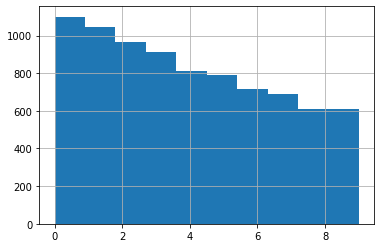

In [4]:
df_image['category'].hist()
plt.show()

In [5]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8255 entries, 0 to 8254
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        8255 non-null   object
 1   category  8255 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 129.1+ KB


In [6]:
df_image.groupby(['category']).agg(['count'])

,id
,count
category,
0,1100
1,1048
2,966
3,910
4,809
5,790
6,718
7,691


# Over sample

In [7]:
max_size = df_image['category'].value_counts().max()

In [8]:
lst = [df_image]
for class_index, group in df_image.groupby('category'):
    lst.append(group.sample(max_size-len(group), replace=True))
df_upsampled = pd.concat(lst)

In [9]:
df_upsampled.groupby(['category']).agg(['count'])

,id
,count
category,
0,1100
1,1100
2,1100
3,1100
4,1100
5,1100
6,1100
7,1100


# Train

In [10]:
from sklearn.model_selection import KFold
from keras.applications.resnet50 import ResNet50
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
from PIL import Image, ImageOps
import numpy as np
import requests
import io
import PIL
from sklearn.preprocessing import normalize

model = ResNet50(include_top=False, weights='imagenet', classes=1000)

def extract_feature(imgpath):
  if imgpath.find('http')!=-1:
      r = requests.get(imgpath, allow_redirects=True, timeout=10)
      image_bytes = io.BytesIO(r.content)
      img = PIL.Image.open(image_bytes)
  else:
      img = image.load_img(imgpath)
  img = ImageOps.fit(img, (224, 224), Image.ANTIALIAS)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x, batch_size=1,verbose=0)
  features = np.ndarray.flatten(features).astype('float64')
  feat = normalize([features])[0]
  return feat

94773248/94765736 [==============================] - 1s 0us/step


In [11]:
df_raw = df_upsampled[:]

In [12]:
df_raw

,id,category
0,75606737-d17d-43eb-86e6-6735b6f45a52.png,8
1,800e3baf-9ab1-48c0-a9ce-46c5fac9ff69.png,1
2,c40b7fc4-07f1-4c78-abac-121bde38e267.png,0
3,1b2e1b3d-46f2-4c3f-b741-a8d5099ce710.png,4
4,b8fd3385-9403-48a4-9d9e-74bde635e688.png,9
...,...,...
891,878d60d2-e97b-48aa-af64-ed3f385a02ba.png,9
7887,afaaae4c-f746-489a-85f1-9758ac6d526a.png,9
3115,45c5afa4-4bc3-4c61-b2b7-ef7d742cf427.png,9
7919,bf378e6d-e7fc-48b7-8c55-b15a539972ff.png,9
